## TANZANIA WATER CLASSIFICATION

objectives
- To build a classification model which will be able to clasify whether the waterpumps are faulty are functional, not functional and non functional
- If population round the waterpoint affects the lifespan of the waterpump
- The majority pump investor by number
- Identify the relationship of the waterpump to other  

In [380]:
# Loading relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [381]:
# loading the data
dataset_1 = pd.read_csv(r'C:\Users\espym.LAPTOP-41F90NSA\projects\practise\Tanzania Water\Data\labels.csv')
dataset_2 = pd.read_csv(r'C:\Users\espym.LAPTOP-41F90NSA\projects\practise\Tanzania Water\Data\testing.csv')
dataset_3 = pd.read_csv(r'C:\Users\espym.LAPTOP-41F90NSA\projects\practise\Tanzania Water\Data\training_set.csv')

We have three sets of data. Training, testing and labels 

In [382]:
# function to preview the data
def preview_data (data):
    print(data.columns)
    return preview_data

In [383]:
preview_data(dataset_1)
preview_data(dataset_2)
preview_data(dataset_3)

Index(['id', 'status_group'], dtype='object')
Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')
Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meetin

<function __main__.preview_data(data)>

In [384]:
dataset_1.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [385]:
# merging the training and labels dataset 

data = pd.merge(dataset_1,dataset_3,on='id')
data

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,functional,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,functional,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,functional,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,functional,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


The data has 59400 rows and 41 columns

## Data Cleaning

In this section, we do data cleaning. We will check for:
- missing values
- duplicate values
- dropping columns which wont be used in the analysis
- correct data format

In [386]:
# Checking if the columns are in their correct data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   status_group           59400 non-null  object 
 2   amount_tsh             59400 non-null  float64
 3   date_recorded          59400 non-null  object 
 4   funder                 55763 non-null  object 
 5   gps_height             59400 non-null  int64  
 6   installer              55745 non-null  object 
 7   longitude              59400 non-null  float64
 8   latitude               59400 non-null  float64
 9   wpt_name               59398 non-null  object 
 10  num_private            59400 non-null  int64  
 11  basin                  59400 non-null  object 
 12  subvillage             59029 non-null  object 
 13  region                 59400 non-null  object 
 14  region_code            59400 non-null  int64  
 15  di

In [387]:
# Dropping the irrelevant columns column
columns_to_drop = ['scheme_name', 'longitude', 'latitude', 'num_private','date_recorded', 'wpt_name', 
                   'subvillage', 'region_code', 'district_code', 'lga','recorded_by', 'extraction_type_group',
                     'extraction_type_class','source_class', 'waterpoint_type_group', 'id']
data.drop(columns=columns_to_drop, inplace=True)


In [388]:
# Checking null values
nulls = lambda x: data.isnull().sum()
nulls(data)

status_group            0
amount_tsh              0
funder               3637
gps_height              0
installer            3655
basin                   0
region                  0
ward                    0
population              0
public_meeting       3334
scheme_management    3878
permit               3056
construction_year       0
extraction_type         0
management              0
management_group        0
payment                 0
payment_type            0
water_quality           0
quality_group           0
quantity                0
quantity_group          0
source                  0
source_type             0
waterpoint_type         0
dtype: int64

In [389]:
# Handling the missing values
data.dropna(inplace=True)

The missing values account for a small percentage of the data. We will go ahead and drop the rows with missing values

In [390]:
# previewing to check if the missing values have been replaced
data.isnull().sum().T

status_group         0
amount_tsh           0
funder               0
gps_height           0
installer            0
basin                0
region               0
ward                 0
population           0
public_meeting       0
scheme_management    0
permit               0
construction_year    0
extraction_type      0
management           0
management_group     0
payment              0
payment_type         0
water_quality        0
quality_group        0
quantity             0
quantity_group       0
source               0
source_type          0
waterpoint_type      0
dtype: int64

In [391]:
# checking for duplicate values
data.duplicated().sum()

7532

In [392]:
# dropping duplicates
data.drop_duplicates(inplace=True)

### Conversion of data types

In [ ]:
# Checking for columns values
data['construction_year'].value_counts()

We notice an irregularity in the construction year as we have many entries with 0. We will filter values with relevant years 1960 - 2013.

In [394]:
# filtering construction year to start from 1960
data= data[(data['construction_year'] >= 1960) & (data['construction_year'] <= 2013)]

In [395]:
# conversion of column format to date format
data.loc[:, 'construction_year'] = pd.to_datetime(data['construction_year'],format='%Y')

In [396]:
data.shape

(31952, 25)

## Exploratory Data Analysis

The dataset has a combination of both numerical and categorical variables. We shall perform eda on both of them separately. 

### Categorical Variables

In [397]:
# extracting the categorical variables
categorical = [column for column in data.columns if data[column].dtype == 'O']
print('The categorical variables: {} '.format(categorical))

The categorical variables: ['status_group', 'funder', 'installer', 'basin', 'region', 'ward', 'public_meeting', 'scheme_management', 'permit', 'extraction_type', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'waterpoint_type'] 


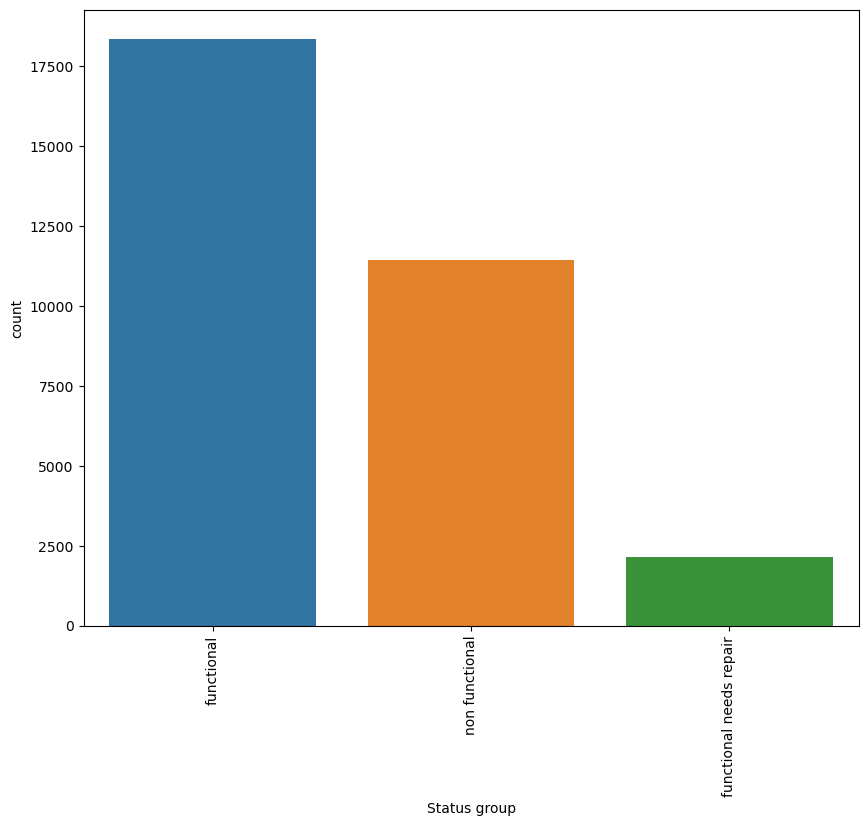

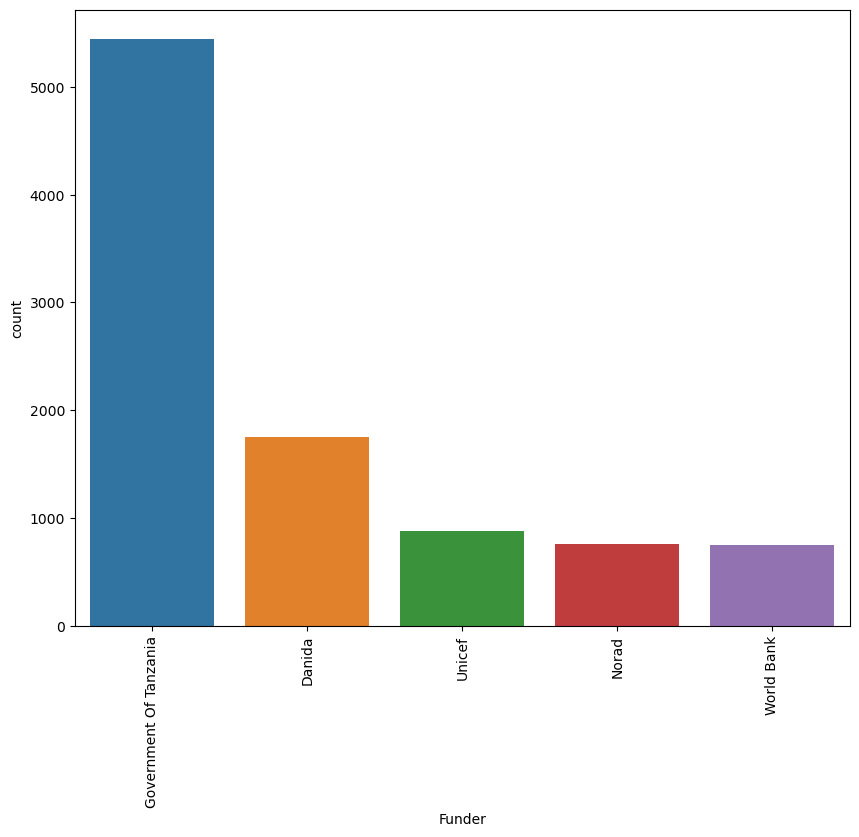

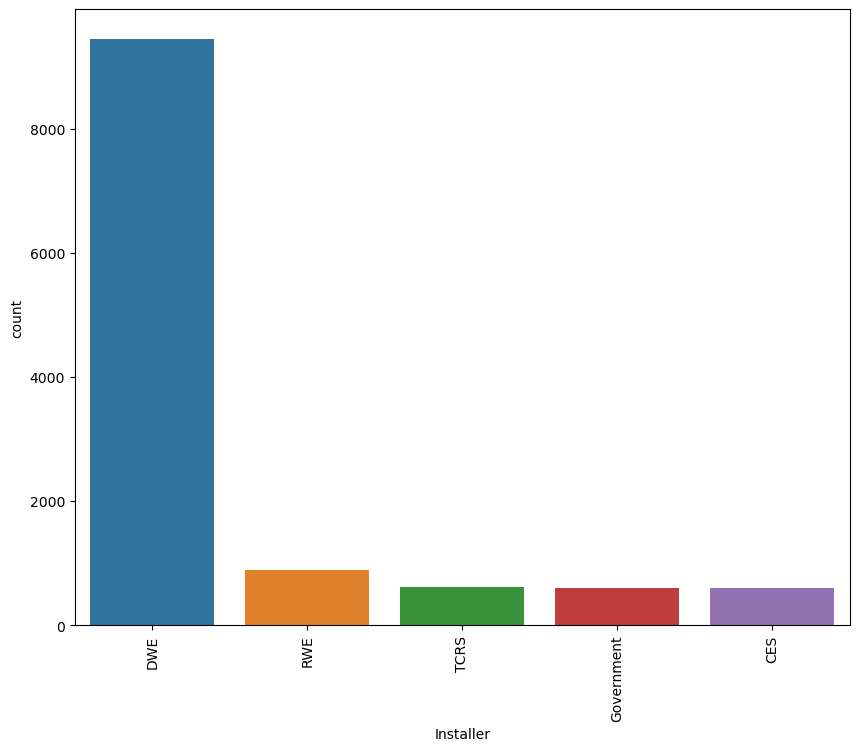

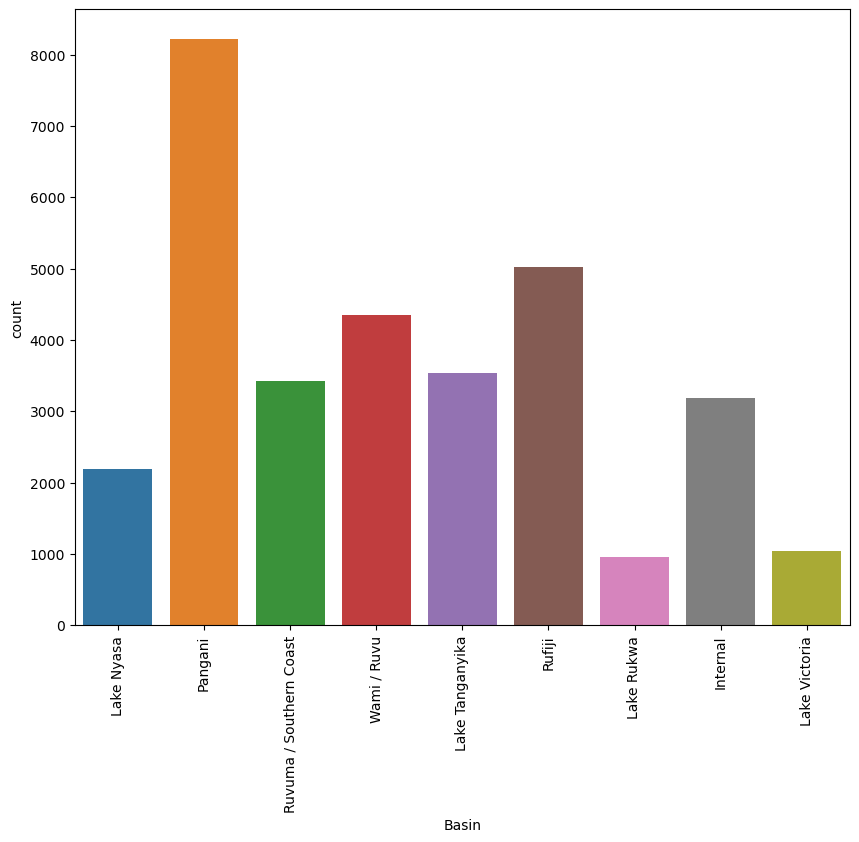

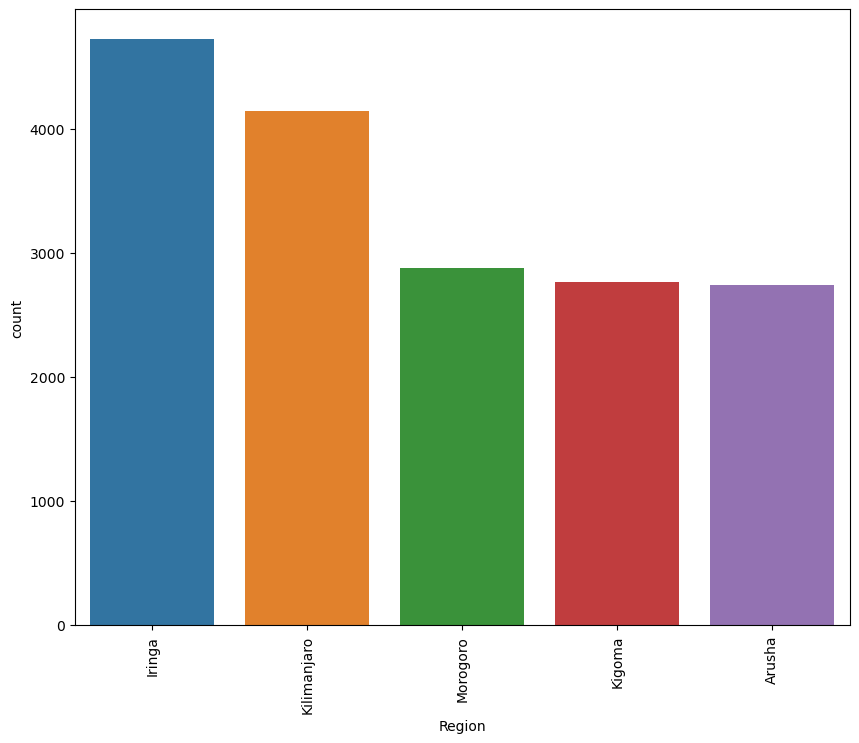

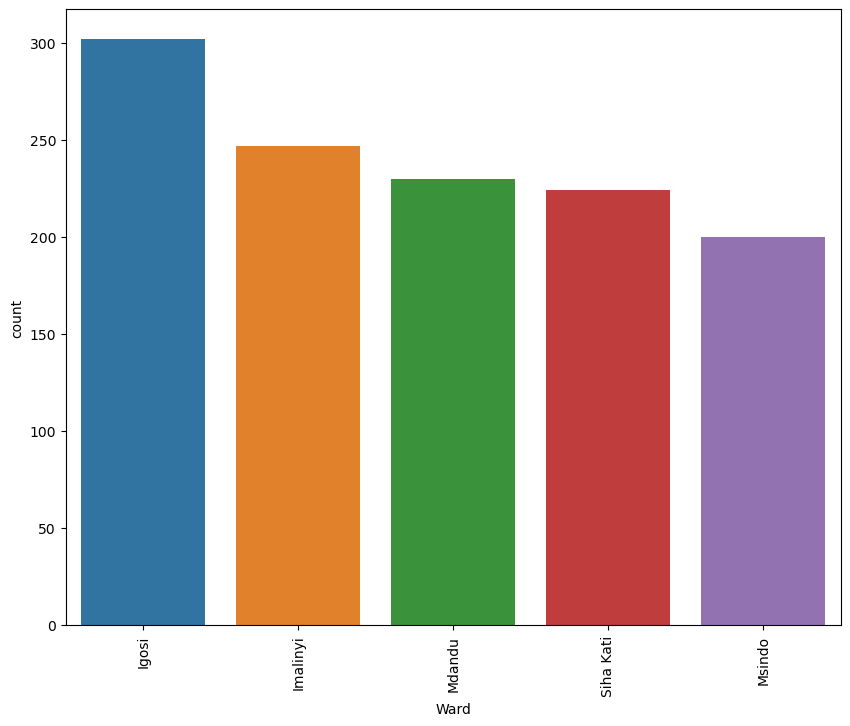

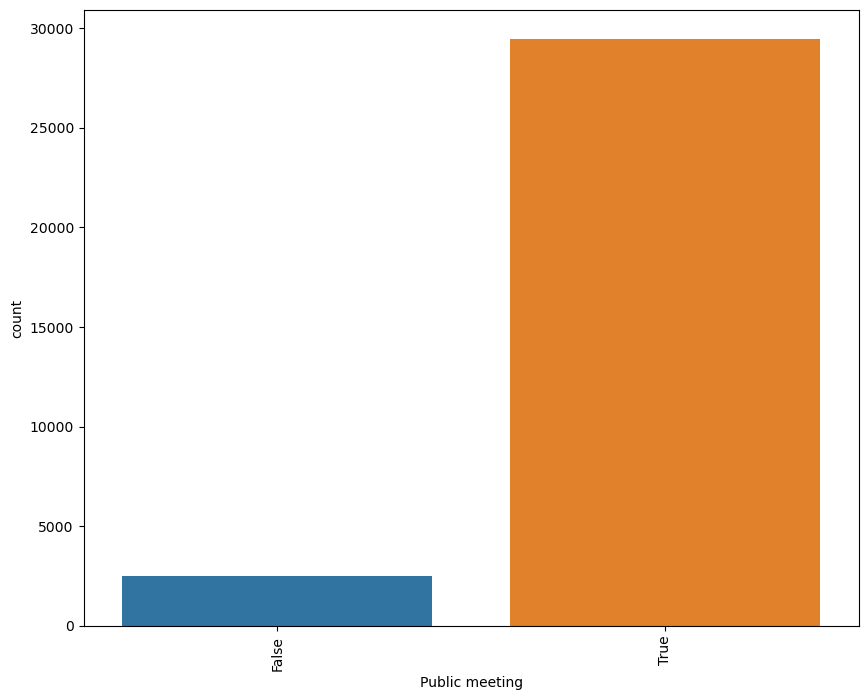

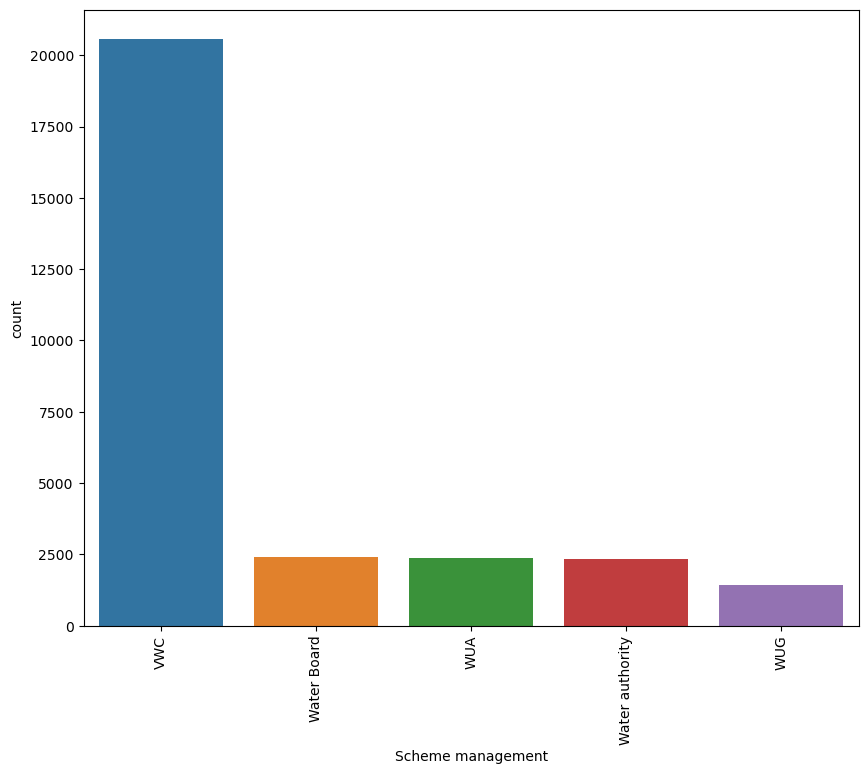

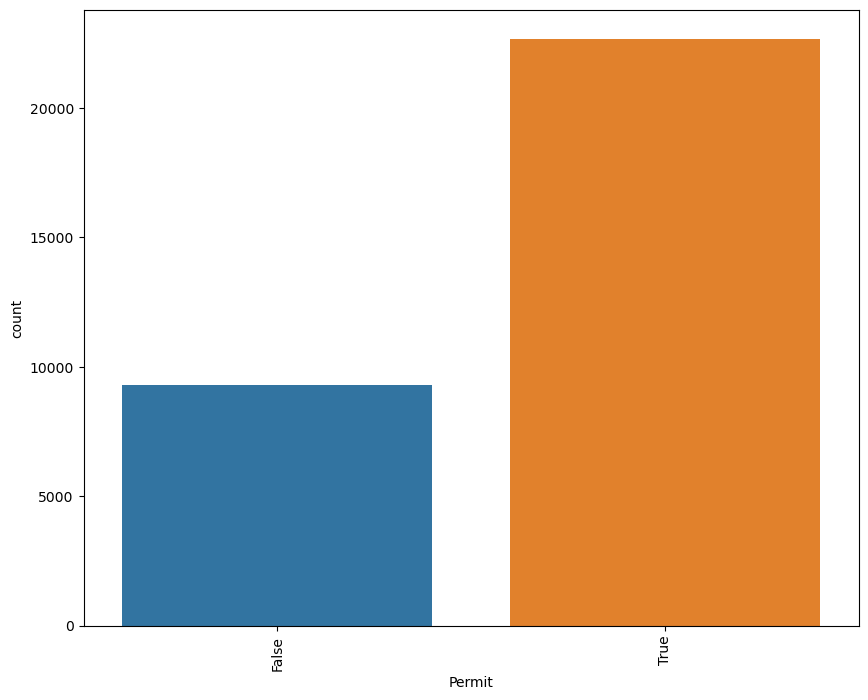

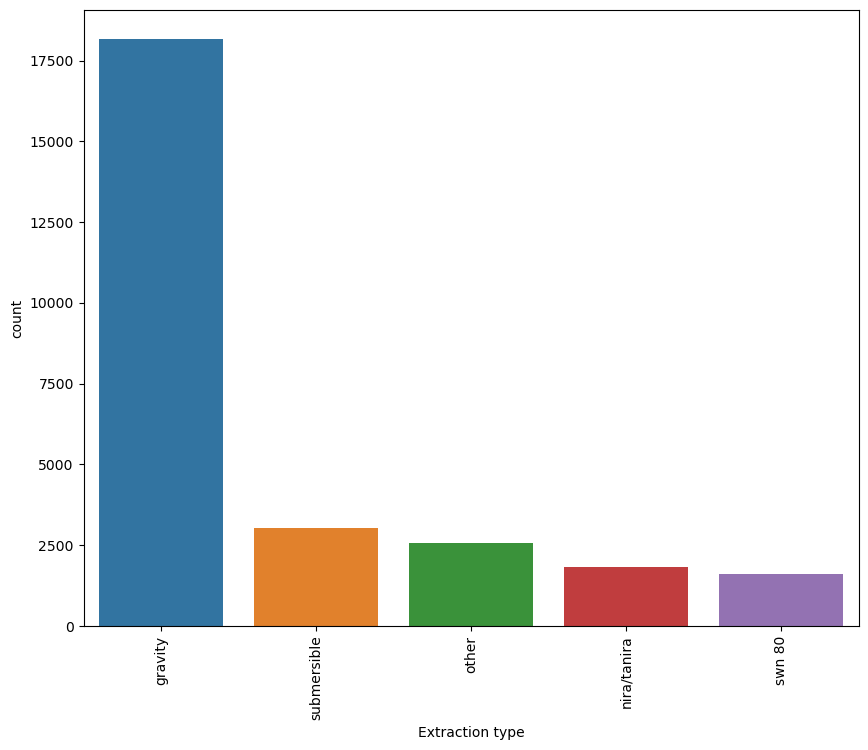

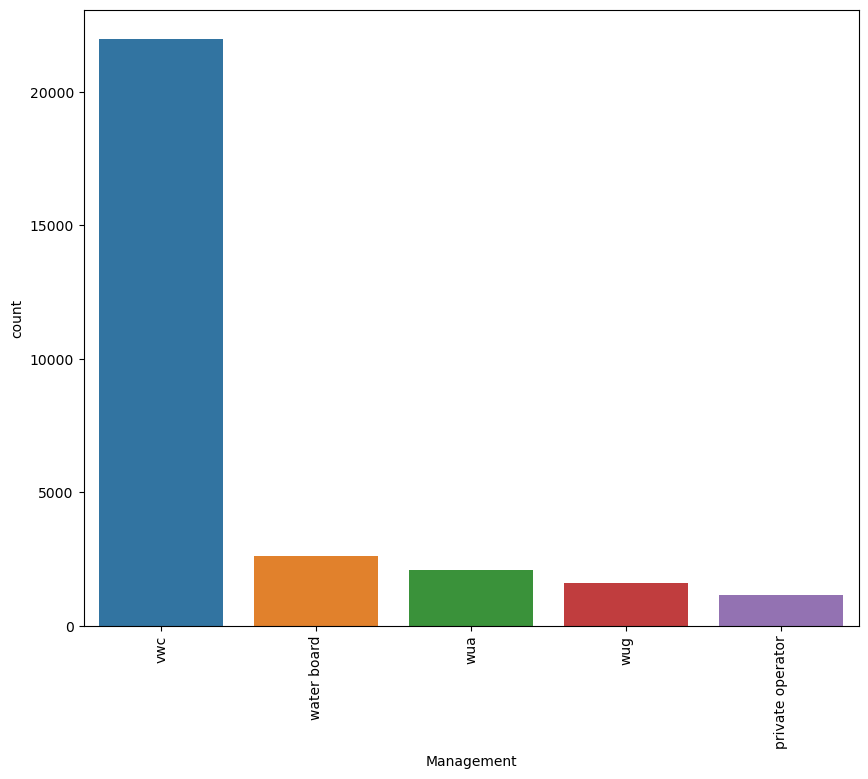

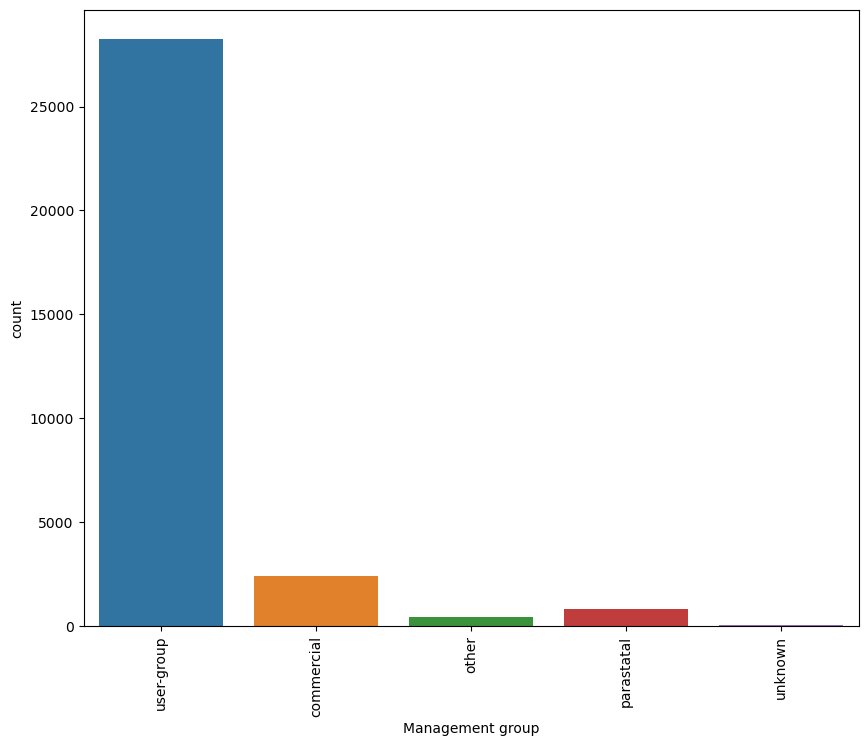

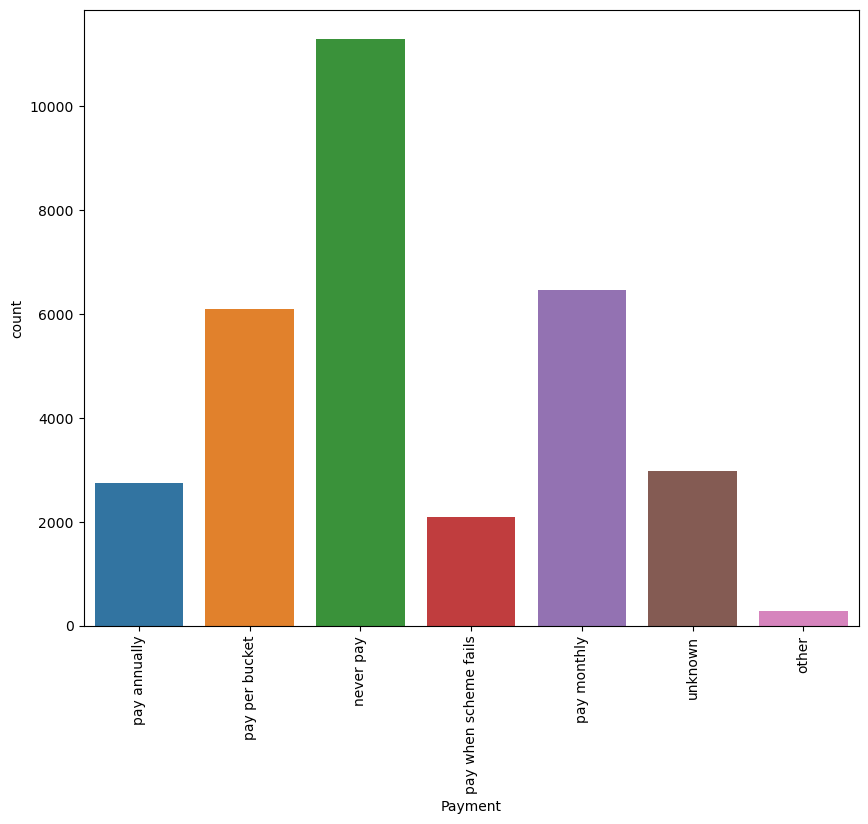

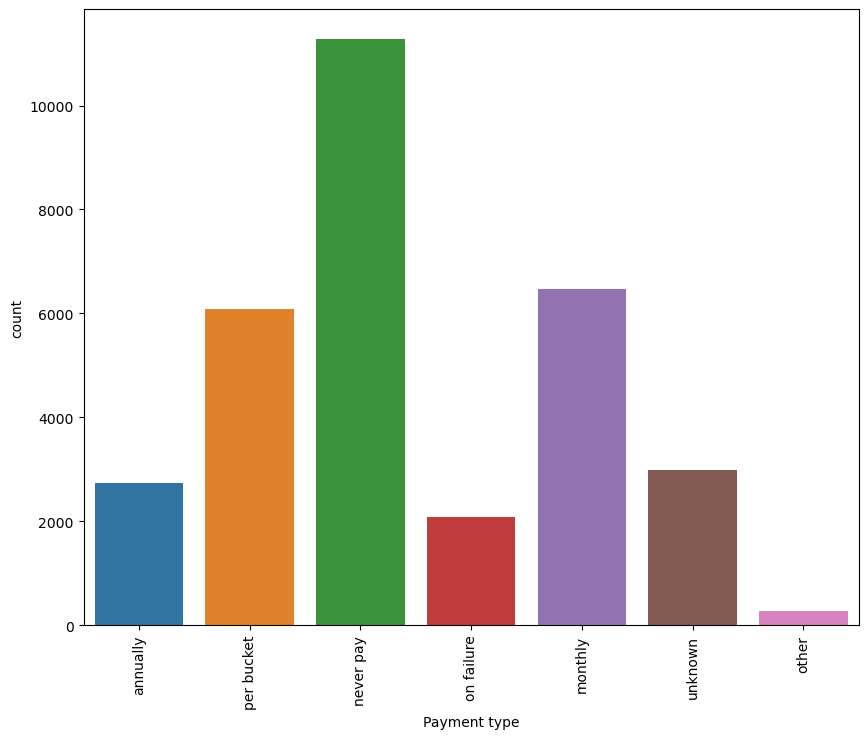

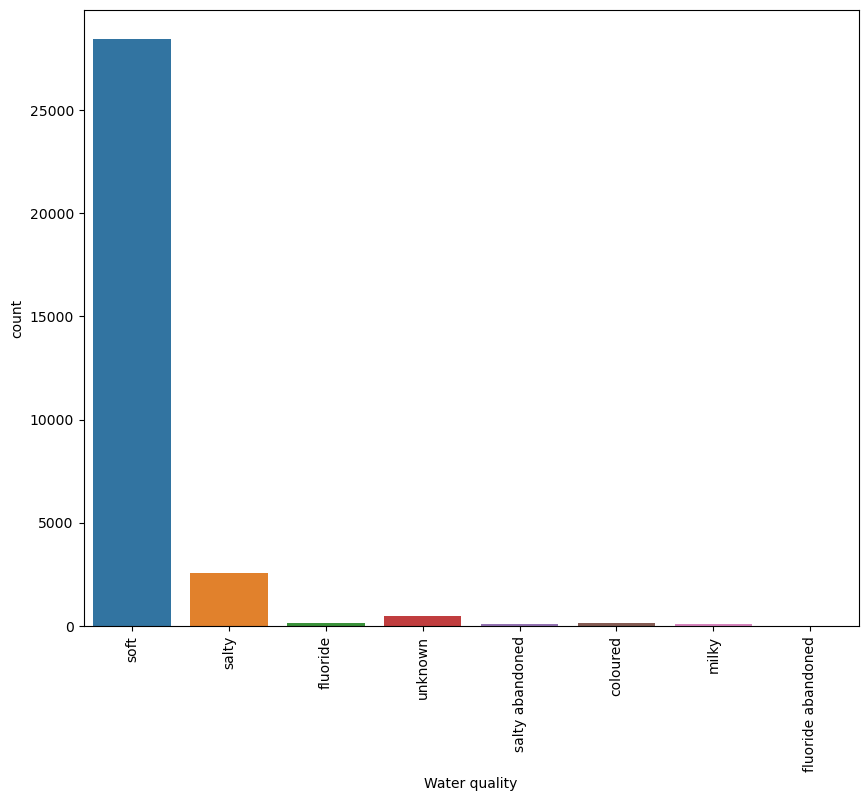

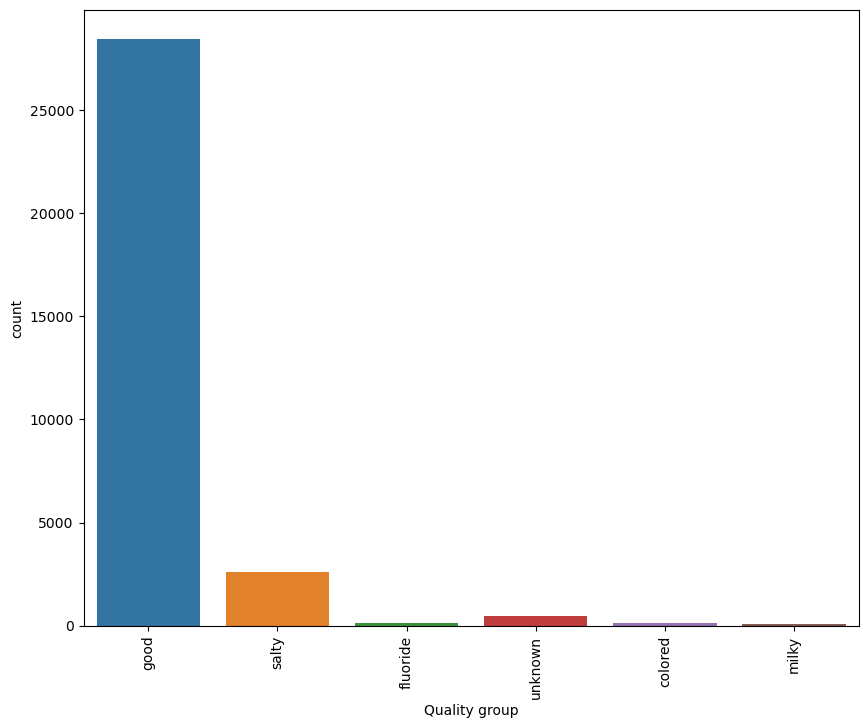

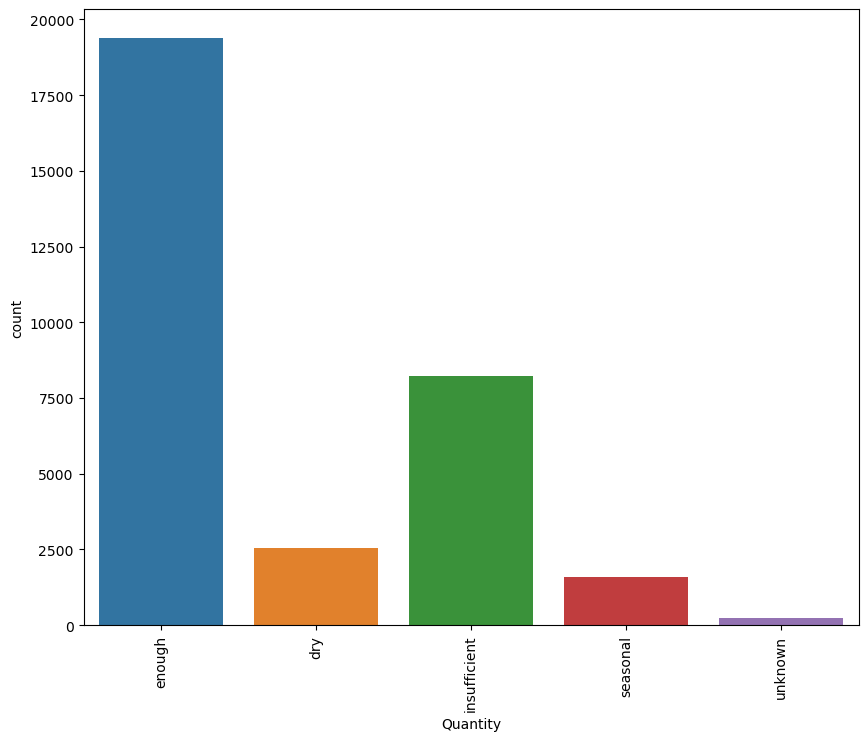

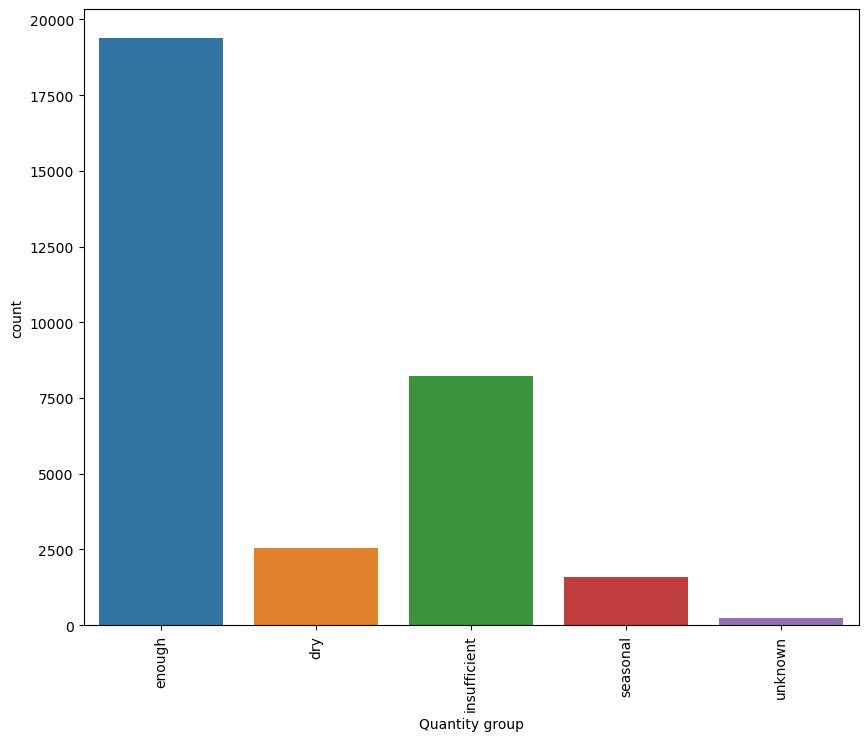

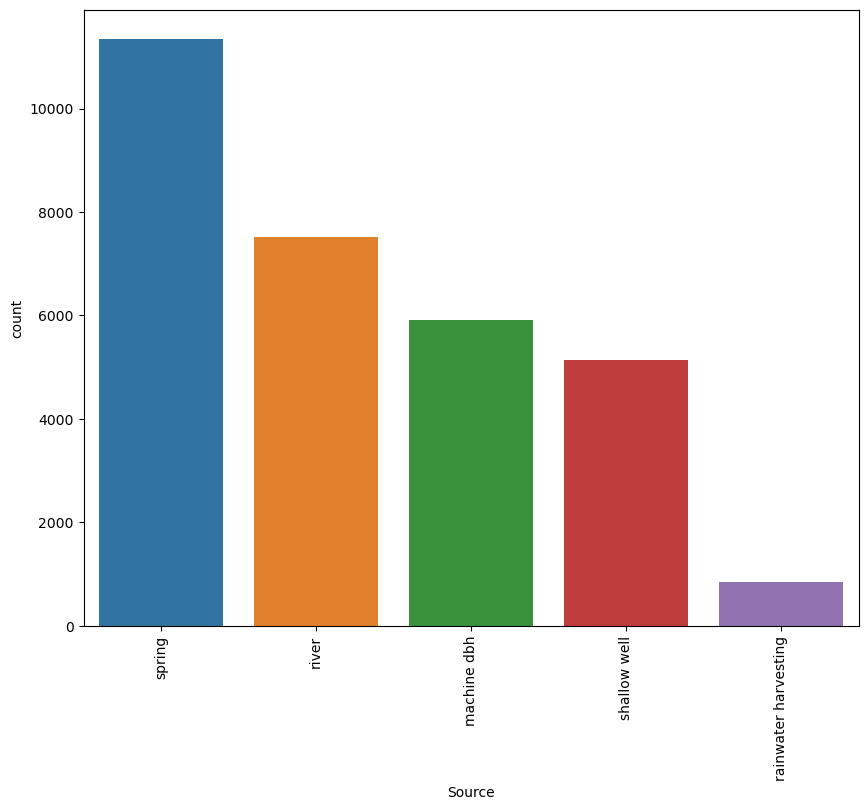

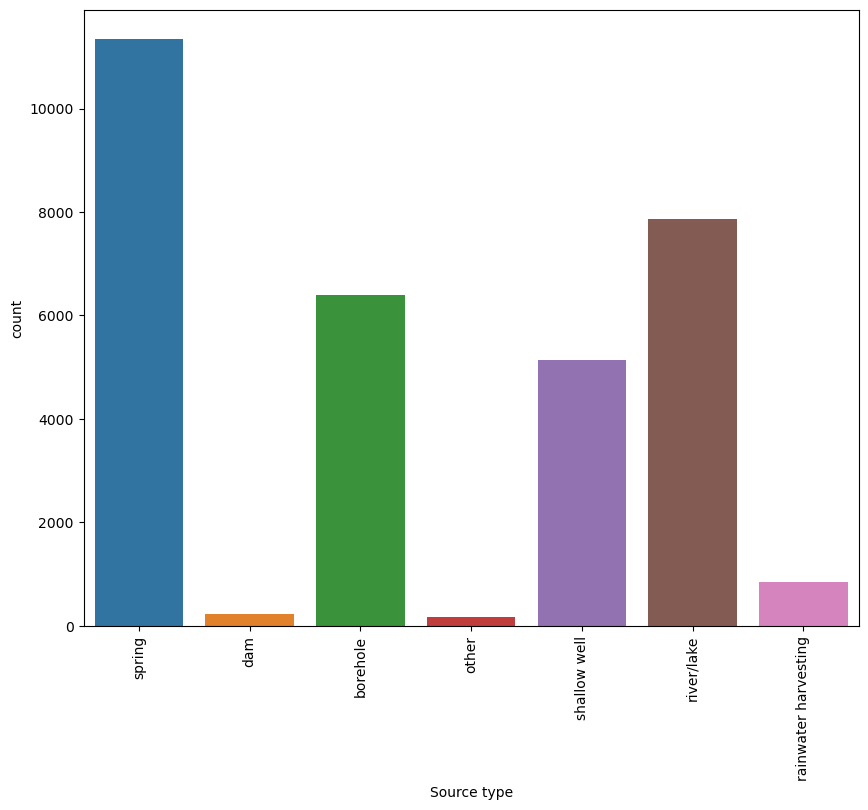

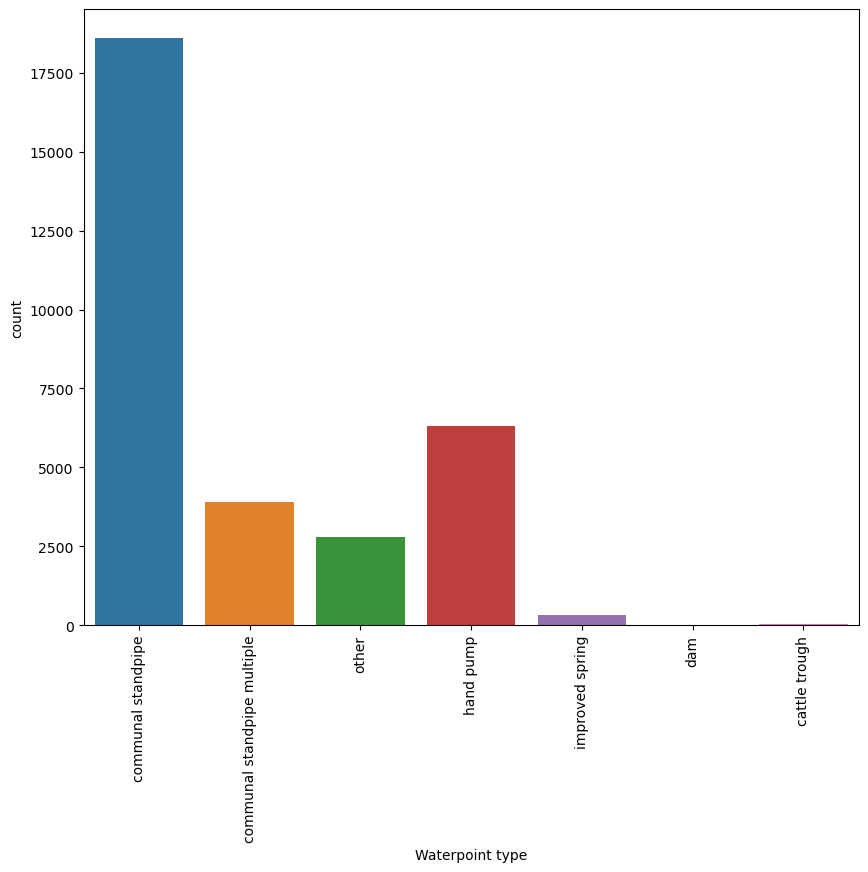

In [398]:
# plotting the numerical variables
for cat in categorical:
    if len(data[cat].unique()) >= 10:
        top_5 = data[cat].value_counts().head(5)
        plt.figure(figsize=(10,8))
        sns.countplot(x= cat,data=data,order=top_5.index)
        plt.xticks(rotation=90)
        plt.xlabel(f'{cat}'.capitalize().replace("_", " "))
        plt.show()
    else:
        plt.figure(figsize=(10,8))
        sns.countplot(x= cat,data=data)
        plt.xlabel(f'{cat}'.capitalize().replace("_", " "))
        plt.xticks(rotation=90)
        plt.show()

In [399]:
# checking for the percentage of values on the target column
percentage_status_group = pd.DataFrame(data['status_group'].value_counts(normalize=True))
percentage_status_group

,proportion
status_group,
functional,0.574049
non functional,0.358100
functional needs repair,0.067852


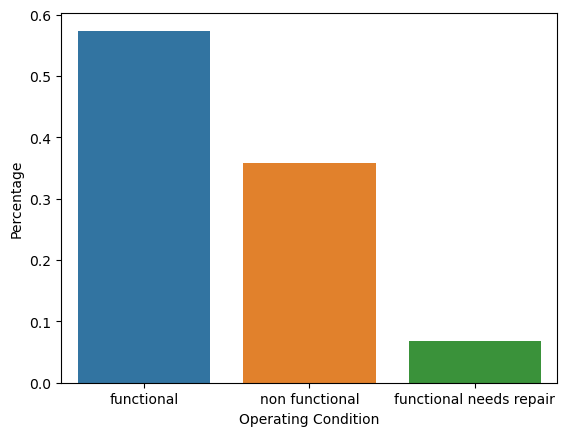

In [400]:
# Plotting the percentage of the Operation Status of the waterpoints
percentage_status_group.reset_index(inplace=True)
percentage_status_group.columns = ['status_group', 'percentage']

sns.barplot(x='status_group',y='percentage',data=percentage_status_group)
plt.xlabel('Operating Condition')
plt.ylabel('Percentage')
plt.show() 

From the visualization, we see that 56% of the waterpoints are functional, 37% are non functional while 7% are functional but need repair 

### Numerical Variables

In [401]:
# Extracting numerical variables from data
numerical = [column for column in data.columns if data[column].dtype != "O"]
print('The numerical columns: {}'.format(numerical))

The numerical columns: ['amount_tsh', 'gps_height', 'population', 'construction_year']


In [402]:
# Summary statistics of the dataset
data.describe()

,amount_tsh,gps_height,population,construction_year
count,31952.000000,31952.000000,31952.000000,31952
mean,513.613952,1018.188032,259.569823,1996-10-16 01:01:36.444667008
min,0.000000,-63.000000,0.000000,1960-01-01 00:00:00
25%,0.000000,405.000000,28.000000,1986-01-01 00:00:00
50%,0.000000,1149.000000,140.000000,2000-01-01 00:00:00
75%,250.000000,1494.000000,300.000000,2008-01-01 00:00:00
max,250000.000000,2770.000000,30500.000000,2013-01-01 00:00:00
std,3250.380907,616.959918,548.244792,NaN


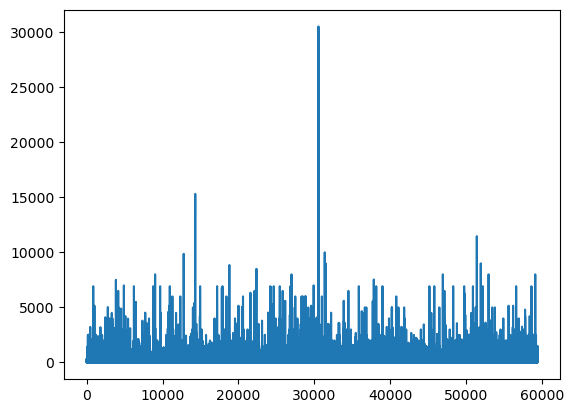

In [403]:
# plotting a correlation matrix
data['population'].plot(kind="line")
plt.show()

In [404]:
# Data Preprocessing
categorical = [column for column in data.columns if data[column].dtype == "O"]
numerical = [column for column in data.columns if data[column].dtype !=  "O"]

print('list of caegorical {}'.format(categorical))
len(categorical)

list of caegorical ['status_group', 'funder', 'installer', 'basin', 'region', 'ward', 'public_meeting', 'scheme_management', 'permit', 'extraction_type', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'waterpoint_type']


21

In [405]:
# data = pd.get_dummies(data,columns=categorical, drop_first=True)
data['payment_type'].value_counts()

payment_type
never pay     11286
monthly        6467
per bucket     6091
unknown        2988
annually       2744
on failure     2093
other           283
Name: count, dtype: int64

In [406]:
data.shape

(31952, 25)

In [407]:
# # # Encoding the categorical variables
# import category_encoders as ce
# encoder = ce.HashingEncoder(cols=categorical)
# data = encoder.fit_transform(data)

In [408]:
data

,status_group,amount_tsh,funder,gps_height,installer,basin,region,ward,population,public_meeting,...,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,waterpoint_type
0,functional,6000.0,Roman,1390,Roman,Lake Nyasa,Iringa,Mundindi,109,True,...,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,communal standpipe
2,functional,25.0,Lottery Club,686,World vision,Pangani,Manyara,Ngorika,250,True,...,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,communal standpipe multiple
3,non functional,0.0,Unicef,263,UNICEF,Ruvuma / Southern Coast,Mtwara,Nanyumbu,58,True,...,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,communal standpipe multiple
5,functional,20.0,Mkinga Distric Coun,0,DWE,Pangani,Tanga,Moa,1,True,...,user-group,pay per bucket,per bucket,salty,salty,enough,enough,other,other,communal standpipe multiple
10,functional,0.0,Private,62,Private,Wami / Ruvu,Pwani,Tambani,345,True,...,commercial,never pay,never pay,salty,salty,enough,enough,machine dbh,borehole,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59391,non functional,0.0,Government Of Tanzania,540,Government,Pangani,Kilimanjaro,Maore,210,True,...,user-group,never pay,never pay,soft,good,enough,enough,river,river/lake,communal standpipe
59394,non functional,500.0,World Bank,351,ML appro,Wami / Ruvu,Morogoro,Diongoya,89,True,...,user-group,pay monthly,monthly,soft,good,enough,enough,machine dbh,borehole,communal standpipe
59395,functional,10.0,Germany Republi,1210,CES,Pangani,Kilimanjaro,Masama Magharibi,125,True,...,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,communal standpipe
59396,functional,4700.0,Cefa-njombe,1212,Cefa,Rufiji,Iringa,Ikondo,56,True,...,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,communal standpipe


In [409]:
# # encoding the data categorical variables

# from sklearn.preprocessing import OneHotEncoder

# ohe = OneHotEncoder()

# # filtering the columns to be transformed
# subset = data[categorical]

# # inititalizing ohe
# encoded_data = ohe.fit_transform(subset)

# # converting subset to a dataframe

# encoded_data = pd.DataFrame(encoded_data.toarray(), columns=ohe.get_feature_names_out(subset.columns))

# encoded_data = pd.concat([data.drop(columns=categorical), encoded_data],axis=1)

In [410]:
# encoded_data.info()

In [411]:
# # scaling the numerical variables

# numerical = [column for column in data.columns if data[column].dtypes != "O"]
# from sklearn.preprocessing import StandardScaler

# scaler =  StandardScaler()

# encoded_data = scaler.fit_transform(data.drop(columns=numerical))

In [412]:
encoded_data['funder'].nunique()

1588